In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("flood.csv")  # Replace with actual file name

# Handle missing values
imputer = SimpleImputer(strategy='mean')  # For numerical columns
df.fillna(df.mean(), inplace=True)  # Fill missing numerical values with mean

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply One-Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
categorical_encoded = pd.DataFrame(encoder.fit_transform(df[categorical_cols]))
categorical_encoded.columns = encoder.get_feature_names_out(categorical_cols)

# Drop original categorical columns and merge encoded data
df = df.drop(columns=categorical_cols)
df = pd.concat([df, categorical_encoded], axis=1)

# Define features and target (Assume 'Flood_Risk' is the target variable)
X = df.drop(columns=['Flood_Risk'])  # Replace with actual target column
y = df['Flood_Risk']

# Standardize numerical features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split data into train (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train models and compare accuracy
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")

# Display model comparison
print("\nModel Performance Comparison:")
print(pd.DataFrame(results.items(), columns=['Model', 'Accuracy']))


TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv("flood.csv")  # Replace with actual file name

# Define features and target
X = df.drop(columns=['FloodProbability'])  # Replace with actual target column
y = df['FloodProbability']

# Reduce dataset size for memory optimization
X, y = X.sample(n=10000, random_state=42), y.sample(n=10000, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train models and compare performance
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=50, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=50, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MAE": mae, "R² Score": r2}

# Display model comparison
print("\nModel Performance Comparison:")
print(pd.DataFrame(results).T)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import KBinsDiscretizer

# Load dataset
df = pd.read_csv("flood.csv")  # Replace with actual file name

# Define features and target
X = df.drop(columns=['FloodProbability'])  # Replace with actual target column
y = df['FloodProbability']

# Convert continuous target variable into categories (Low, Medium, High Risk)
kbin = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
y_categorized = kbin.fit_transform(y.values.reshape(-1, 1)).astype(int).ravel()

# Reduce dataset size for memory optimization
X, y_categorized = X.sample(n=12000, random_state=42), y_categorized[:10000]

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorized, test_size=0.3, random_state=42)

# Train models and compare performance
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=50, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=50, random_state=42),
    "MaxEnt (Logistic Regression)": LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    if name == "MaxEnt (Logistic Regression)":
        accuracy = (y_pred == y_test).mean()
        results[name] = {"Accuracy": accuracy}
    else:
        # Regression metrics
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results[name] = {"MAE": mae, "R² Score": r2}

# Display model comparison
print("\nModel Performance Comparison:")
print(pd.DataFrame(results).T)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Load dataset
df = pd.read_csv("flood.csv")  # Replace with actual file name

# Define features and target
X = df.drop(columns=['FloodProbability'])  # Replace with actual target column
y = df['FloodProbability']

# Convert continuous target variable into categories (Low, Medium, High Risk)
kbin = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
y_categorized = kbin.fit_transform(y.values.reshape(-1, 1)).astype(int).ravel()

# Reduce dataset size for memory optimization
X, y_categorized = X.sample(n=10000, random_state=42), y_categorized[:10000]

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorized, test_size=0.3, random_state=42)

# Train models and compare performance
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB(),
    "MaxEnt (Logistic Regression)": LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Classification metric: Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {"Accuracy": accuracy}

# Display model comparison
print("\nModel Performance Comparison:")
print(pd.DataFrame(results).T)



Model Performance Comparison:
                              Accuracy
Decision Tree                 0.857000
K-Nearest Neighbors           0.852333
Support Vector Machine        0.857333
Naive Bayes                   0.857333
MaxEnt (Logistic Regression)  0.857333
Random Forest                 0.857000
XGBoost                       0.855333


C:\Users\Rajveer Singh\AppData\Local\Temp\ipykernel_22028\3836577982.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df["Accuracy"], palette="viridis")


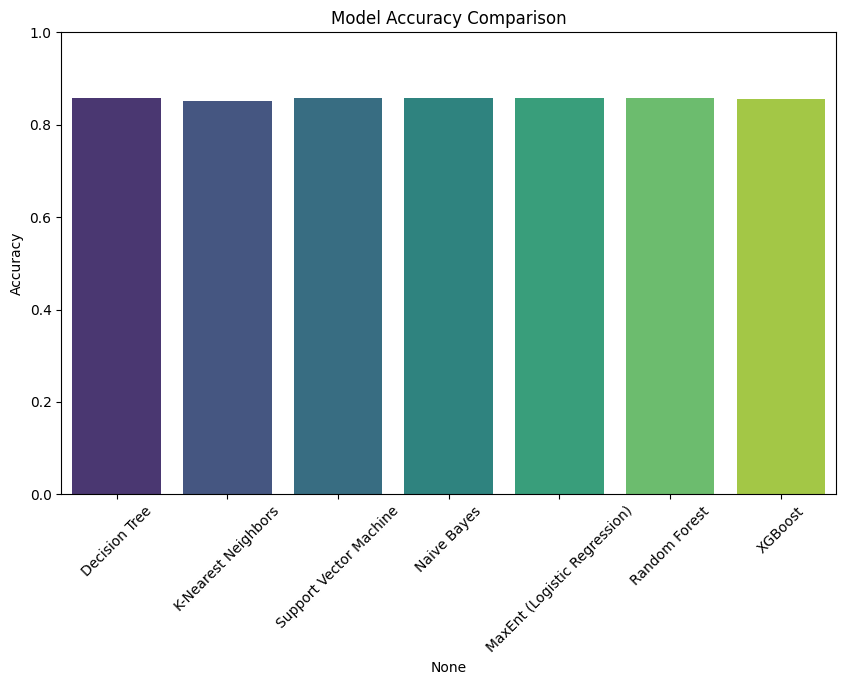

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import KBinsDiscretizer

# Load dataset
df = pd.read_csv("flood.csv")  # Replace with actual file name

# Define features and target
X = df.drop(columns=['FloodProbability'])  # Replace with actual target column
y = df['FloodProbability']

# Convert continuous target variable into categories (Low, Medium, High Risk)
kbin = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
y_categorized = kbin.fit_transform(y.values.reshape(-1, 1)).astype(int).ravel()

# Reduce dataset size for memory optimization
X, y_categorized = X.sample(n=10000, random_state=42), y_categorized[:10000]

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorized, test_size=0.3, random_state=24)

# Define models with hyperparameter tuning
models = {
    "Decision Tree": GridSearchCV(DecisionTreeClassifier(), param_grid={'max_depth': [5, 10, 15]}, cv=5),
    "K-Nearest Neighbors": GridSearchCV(KNeighborsClassifier(), param_grid={'n_neighbors': [3, 5, 7]}, cv=5),
    "Support Vector Machine": GridSearchCV(SVC(), param_grid={'C': [0.1, 1, 10]}, cv=5),
    "Naive Bayes": GaussianNB(),
    "MaxEnt (Logistic Regression)": GridSearchCV(LogisticRegression(solver='lbfgs', max_iter=200), param_grid={'C': [0.1, 1, 10]}, cv=5),

    "Random Forest": GridSearchCV(RandomForestClassifier(), param_grid={'n_estimators': [50, 100, 200]}, cv=5),
    "XGBoost": GridSearchCV(XGBClassifier(), param_grid={'n_estimators': [50, 100, 200]}, cv=5)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    best_model = model.best_estimator_ if isinstance(model, GridSearchCV) else model
    y_pred = best_model.predict(X_test)
    
    # Classification metric: Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {"Accuracy": accuracy}

# Display model comparison
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df)

# Plot accuracy comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df["Accuracy"], palette="viridis")
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.show()
